# Assignment 1 - DV2599 Maskininlärning
## Morris Simons
mosi21@student.bth.se

In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
# Scaling libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# Import the classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Set the color palette for Seaborn
sns.set_palette("viridis")

# Load the dataset
df = pd.read_csv('winequality-red.csv', sep=';')

# Display the first few rows of the dataset again to confirm the correct loading
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Step 1 Visualize the data and understand what we working with

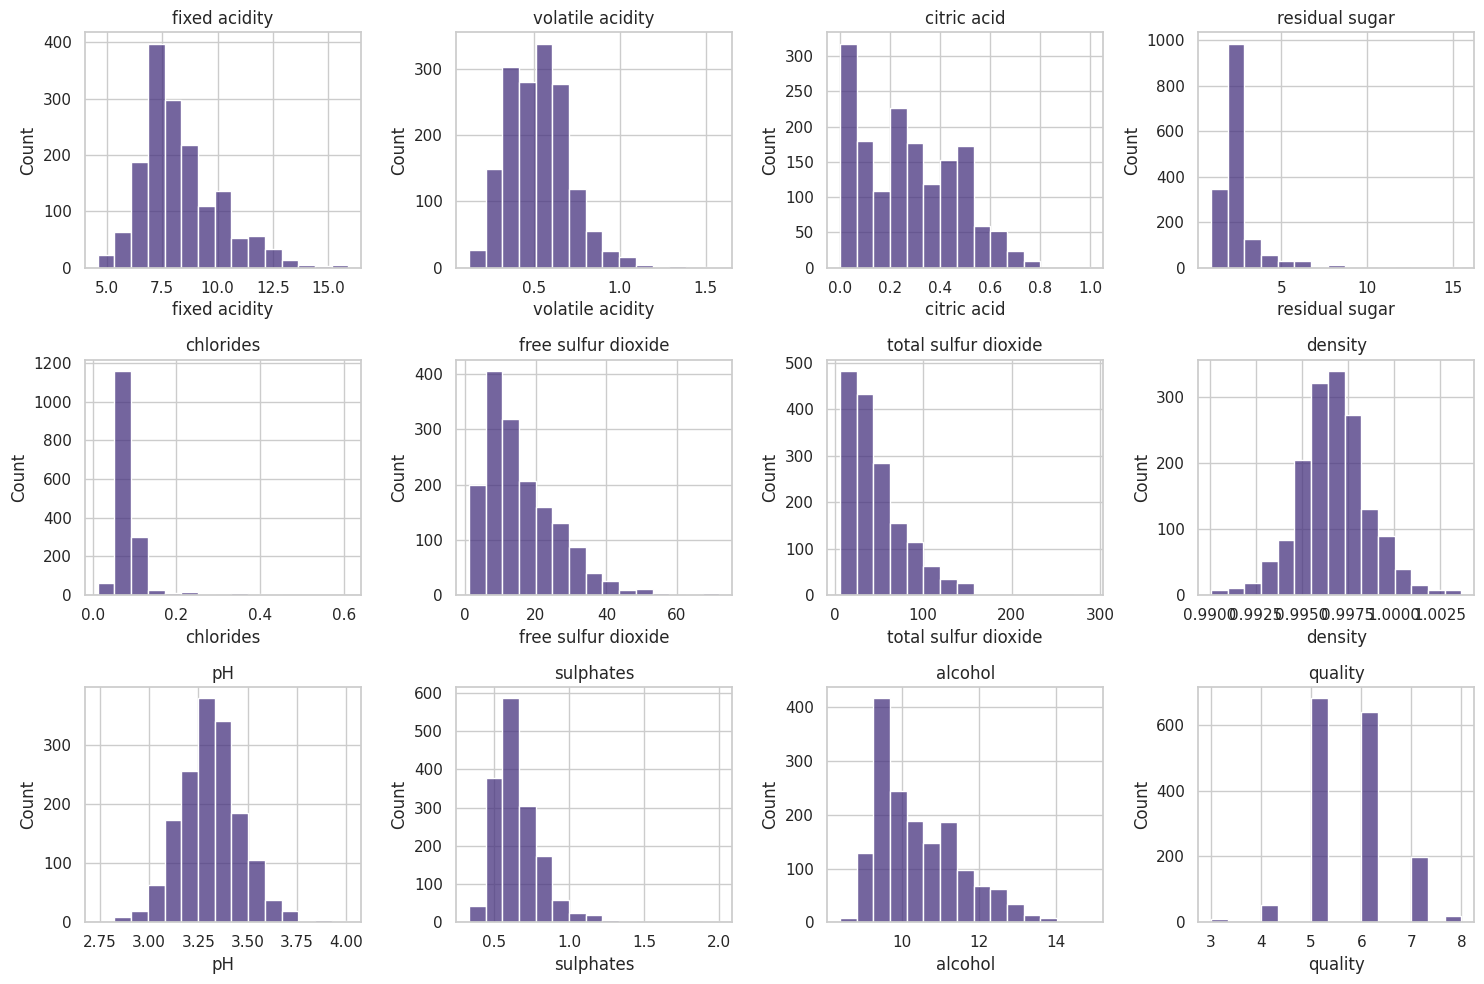

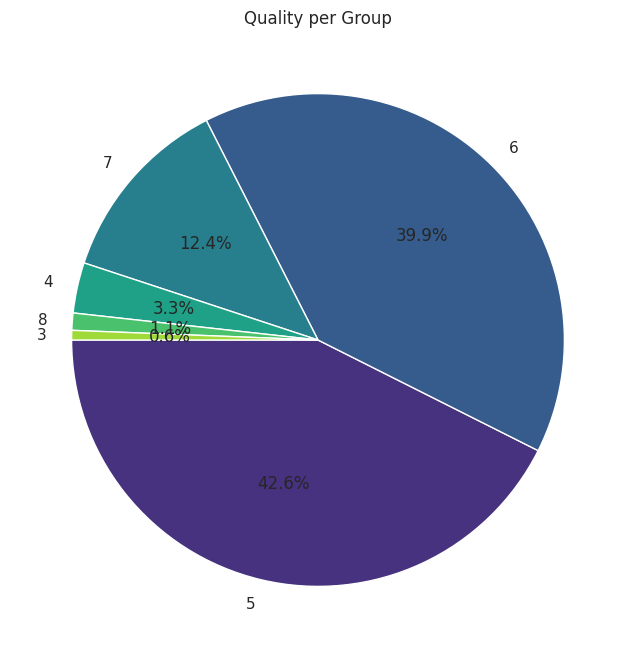

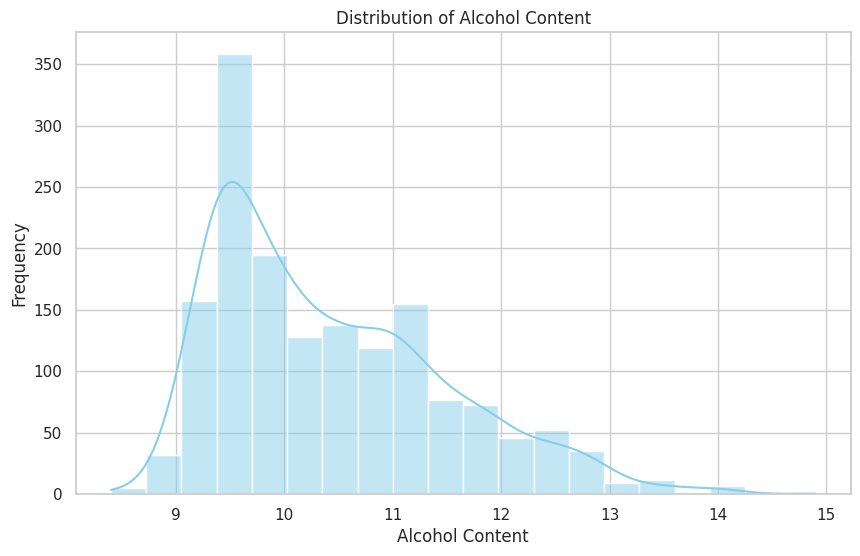

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [44]:
# Histograms for each variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[column], kde=False, bins=15)
    plt.title(column)
    plt.tight_layout()
plt.show()

# Circle plot for quality per group
plt.figure(figsize=(10, 8))
plt.pie(df['quality'].value_counts(), labels=df['quality'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.title('Quality per Group')
plt.show()

# Distribution plot for 'alcohol'
plt.figure(figsize=(10, 6))
sns.histplot(df['alcohol'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

df.describe()

In [45]:
# Check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [46]:
# part 1
case_3 = df['quality']==3
case_4 = df['quality']==4
case_5 = df['quality']==5

desc_case_3 = round(df[case_3].describe(),1)
desc_case_4 = round(df[case_4].describe(),1)
desc_case_5 = round(df[case_5].describe(),1)

cont_cases_1 = pd.concat([desc_case_3, desc_case_4, desc_case_5], axis=1, keys=['3', '4', '5'])

cont_cases_1.T

count  mean   std  min   25%   50%   75%    max
3 fixed acidity          10.0   8.4   1.8  6.7   7.2   7.5   9.9   11.6
  volatile acidity       10.0   0.9   0.3  0.4   0.6   0.8   1.0    1.6
  citric acid            10.0   0.2   0.3  0.0   0.0   0.0   0.3    0.7
  residual sugar         10.0   2.6   1.4  1.2   1.9   2.1   3.1    5.7
  chlorides              10.0   0.1   0.1  0.1   0.1   0.1   0.1    0.3
  free sulfur dioxide    10.0  11.0   9.8  3.0   5.0   6.0  14.5   34.0
  total sulfur dioxide   10.0  24.9  16.8  9.0  12.5  15.0  42.5   49.0
  density                10.0   1.0   0.0  1.0   1.0   1.0   1.0    1.0
  pH                     10.0   3.4   0.1  3.2   3.3   3.4   3.5    3.6
  sulphates              10.0   0.6   0.1  0.4   0.5   0.5   0.6    0.9
  alcohol                10.0  10.0   0.8  8.4   9.7   9.9  10.6   11.0
  quality                10.0   3.0   0.0  3.0   3.0   3.0   3.0    3.0
4 fixed acidity          53.0   7.8   1.6  4.6   6.8   7.5   8.4   12.5
  volatile acidity       53.0   0.7   0.2  0.2   0.5   0.7   0.9    1.1
  citric acid            53.0   0.2   0.2  0.0   0.0   0.1   0.3    1.0
  residual sugar         53.0   2.7   1.8  1.3   1.9   2.1   2.8   12.9
  chlorides              53.0   0.1   0.1  0.0   0.1   0.1   0.1    0.6
  free sulfur dioxide    53.0  12.3   9.0  3.0   6.0  11.0  15.0   41.0
  total sulfur dioxide   53.0  36.2  27.6  7.0  14.0  26.0  49.0  119.0
  density                53.0   1.0   0.0  1.0   1.0   1.0   1.0    1.0
  pH                     53.0   3.4   0.2  2.7   3.3   3.4   3.5    3.9
  sulphates              53.0   0.6   0.2  0.3   0.5   0.6   0.6    2.0
  alcohol                53.0  10.3   0.9  9.0   9.6  10.0  11.0   13.1
  quality                53.0   4.0   0.0  4.0   4.0   4.0   4.0    4.0
5 fixed acidity         681.0   8.2   1.6  5.0   7.1   7.8   8.9   15.9
  volatile acidity      681.0   0.6   0.2  0.2   0.5   0.6   0.7    1.3
  citric acid           681.0   0.2   0.2  0.0   0.1   0.2   0.4    0.8
  residual sugar        681.0   2.5   1.4  1.2   1.9   2.2   2.6   15.5
  chlorides             681.0   0.1   0.1  0.0   0.1   0.1   0.1    0.6
  free sulfur dioxide   681.0  17.0  11.0  3.0   9.0  15.0  23.0   68.0
  total sulfur dioxide  681.0  56.5  37.0  6.0  26.0  47.0  84.0  155.0
  density               681.0   1.0   0.0  1.0   1.0   1.0   1.0    1.0
  pH                    681.0   3.3   0.2  2.9   3.2   3.3   3.4    3.7
  sulphates             681.0   0.6   0.2  0.4   0.5   0.6   0.7    2.0
  alcohol               681.0   9.9   0.7  8.5   9.4   9.7  10.2   14.9
  quality               681.0   5.0   0.0  5.0   5.0   5.0   5.0    5.0

In [47]:
#part 2

case_6 = df['quality']==6
case_7 = df['quality']==7
case_8 = df['quality']==8


desc_case_6 = round(df[case_6].describe(),1)
desc_case_7 = round(df[case_7].describe(),1)
desc_case_8 = round(df[case_8].describe(),1)

cont_cases_1 = pd.concat([desc_case_6, desc_case_7, desc_case_8],
                    axis=1, 
                    keys=['6', '7', '8'])
cont_cases_1.T

count  mean   std   min   25%   50%   75%    max
6 fixed acidity         638.0   8.3   1.8   4.7   7.0   7.9   9.4   14.3
  volatile acidity      638.0   0.5   0.2   0.2   0.4   0.5   0.6    1.0
  citric acid           638.0   0.3   0.2   0.0   0.1   0.3   0.4    0.8
  residual sugar        638.0   2.5   1.4   0.9   1.9   2.2   2.5   15.4
  chlorides             638.0   0.1   0.0   0.0   0.1   0.1   0.1    0.4
  free sulfur dioxide   638.0  15.7   9.9   1.0   8.0  14.0  21.0   72.0
  total sulfur dioxide  638.0  40.9  25.0   6.0  23.0  35.0  54.0  165.0
  density               638.0   1.0   0.0   1.0   1.0   1.0   1.0    1.0
  pH                    638.0   3.3   0.2   2.9   3.2   3.3   3.4    4.0
  sulphates             638.0   0.7   0.2   0.4   0.6   0.6   0.8    2.0
  alcohol               638.0  10.6   1.0   8.4   9.8  10.5  11.3   14.0
  quality               638.0   6.0   0.0   6.0   6.0   6.0   6.0    6.0
7 fixed acidity         199.0   8.9   2.0   4.9   7.4   8.8  10.1   15.6
  volatile acidity      199.0   0.4   0.1   0.1   0.3   0.4   0.5    0.9
  citric acid           199.0   0.4   0.2   0.0   0.3   0.4   0.5    0.8
  residual sugar        199.0   2.7   1.4   1.2   2.0   2.3   2.8    8.9
  chlorides             199.0   0.1   0.0   0.0   0.1   0.1   0.1    0.4
  free sulfur dioxide   199.0  14.0  10.2   3.0   6.0  11.0  18.0   54.0
  total sulfur dioxide  199.0  35.0  33.2   7.0  17.5  27.0  43.0  289.0
  density               199.0   1.0   0.0   1.0   1.0   1.0   1.0    1.0
  pH                    199.0   3.3   0.2   2.9   3.2   3.3   3.4    3.8
  sulphates             199.0   0.7   0.1   0.4   0.6   0.7   0.8    1.4
  alcohol               199.0  11.5   1.0   9.2  10.8  11.5  12.1   14.0
  quality               199.0   7.0   0.0   7.0   7.0   7.0   7.0    7.0
8 fixed acidity          18.0   8.6   2.1   5.0   7.2   8.2  10.2   12.6
  volatile acidity       18.0   0.4   0.1   0.3   0.3   0.4   0.5    0.8
  citric acid            18.0   0.4   0.2   0.0   0.3   0.4   0.5    0.7
  residual sugar         18.0   2.6   1.3   1.4   1.8   2.1   2.6    6.4
  chlorides              18.0   0.1   0.0   0.0   0.1   0.1   0.1    0.1
  free sulfur dioxide    18.0  13.3  11.2   3.0   6.0   7.5  16.5   42.0
  total sulfur dioxide   18.0  33.4  25.4  12.0  16.0  21.5  43.0   88.0
  density                18.0   1.0   0.0   1.0   1.0   1.0   1.0    1.0
  pH                     18.0   3.3   0.2   2.9   3.2   3.2   3.4    3.7
  sulphates              18.0   0.8   0.1   0.6   0.7   0.7   0.8    1.1
  alcohol                18.0  12.1   1.2   9.8  11.3  12.2  12.9   14.0
  quality                18.0   8.0   0.0   8.0   8.0   8.0   8.0    8.0

## comments
Alcohol: This feature does not show a strong skew and appears to have a somewhat uniform distribution over a range. Min-Max Scaling could be applied here to transform the data into a specific range, such as 0 to 1.

Fixed acidity, volatile acidity, citric acid and sulphates are all skewed right. Min-Max Scaling could be applied here to transform the data into a specific range, such as 0 to 1.

pH: The distribution of pH seems relatively symmetric and might be close to a normal distribution. Standard Scaling could be a good choice here, as it works well with features that are normally distributed or close to it.

Density: seems relatively symmetric and might be close to a normal distribution. Standard Scaling could be a good choice here, as it works well with features that are normally distributed or close to it.

Residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide may contain outliers, as indicated by the large difference between the 75th percentile and the maximum value. For these attributes, Robust Scaling is a good choice as it is less sensitive to outliers.

Quality: The quality feature is the target variable. It is a categorical variable with values ranging from 3 to 8. The distribution of quality is is somewhat imbalanced, with the majority of observations falling into the categories of 5 and 6. This could be a problem when training the model, as it may be biased towards the majority class. This can be solved by either oversampling the minority classes or undersampling the majority classes.

## Step 2 Divide the data into new sets

In [48]:
# Step 2: Divide the data into train and test sets
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Original set shape
print("-----------------------------")
print(f'X shape: {X.shape}')
print("-----------------------------")
# testing and training set shapes
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

-----------------------------
X shape: (1599, 11)
-----------------------------
X_train shape: (1279, 11)
X_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)


## Step 3 Perform scaling on the data

### Scaleing 1 Using Z-score normalization

In [49]:
# Step A Perform Z-score scaling on the data
scaler_standard = StandardScaler()
columns_standard = ['pH', 'density']
X_train[columns_standard] = scaler_standard.fit_transform(X_train[columns_standard])
X_test[columns_standard] = scaler_standard.transform(X_test[columns_standard])

### Version 2 using MinMaxScaler


In [50]:
# Step B Perform MinMax scaling on the data
scaler_min_max = MinMaxScaler()
columns_min_max = ['alcohol', 'fixed acidity', 'citric acid','sulphates']
X_train[columns_min_max] = scaler_min_max.fit_transform(X_train[columns_min_max])
X_test[columns_min_max] = scaler_min_max.transform(X_test[columns_min_max])

### Version 3 using RobustScaler

In [51]:
RobustScaler = RobustScaler()
columns_robustScaler = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']
X_train[columns_robustScaler] = RobustScaler.fit_transform(X_train [columns_robustScaler])
X_test[columns_robustScaler] = RobustScaler.transform(X_test[columns_robustScaler])

## Step 4-5: Perform validation using Repeated k-Fold Cross-Validation

In [52]:
# Step 4-5: Perform validation using Repeated k-Fold Cross-Validation
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=RepeatedStratifiedKFold(n_splits=3, n_repeats=10), scoring='accuracy')
print("Random Forest Classifier - Mean Accuracy:", rf_cv_scores.mean())
print("Random Forest Classifier - Standard Deviation:", rf_cv_scores.std())

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_cv_scores = cross_val_score(gb_classifier, X_train, y_train, cv=RepeatedStratifiedKFold(n_splits=3, n_repeats=10), scoring='accuracy')
print("Gradient Boosting Classifier - Mean Accuracy:", gb_cv_scores.mean())
print("Gradient Boosting Classifier - Standard Deviation:", gb_cv_scores.std())

# Identify the best classifier
best_classifier = rf_classifier if rf_cv_scores.mean() > gb_cv_scores.mean() else gb_classifier
print("Best Classifier:", type(best_classifier).__name__)

Random Forest Classifier - Mean Accuracy: 0.6751433922295156
Random Forest Classifier - Standard Deviation: 0.01703307583461706
Gradient Boosting Classifier - Mean Accuracy: 0.6333771298098243
Gradient Boosting Classifier - Standard Deviation: 0.02308839013875529
Best Classifier: RandomForestClassifier


## Steps 6-12: for final model and testing it

In [53]:

# Step 6: Build the final model using the best-performed classifier
best_classifier.fit(X_train, y_train)

# Step 7: Report the model's performance on the test set
y_pred_test = best_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", test_accuracy)

# Step 8-9: Use imbalanced-learn to balance the scaled train set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 10-11: Perform validation on the balanced train set
rf_cv_scores_balanced = cross_val_score(rf_classifier, X_train_balanced, y_train_balanced, cv=RepeatedStratifiedKFold(n_splits=3, n_repeats=10), scoring='accuracy')
print("Random Forest Classifier (Balanced) - Mean Accuracy:", rf_cv_scores_balanced.mean())
print("Random Forest Classifier (Balanced) - Standard Deviation:", rf_cv_scores_balanced.std())

gb_cv_scores_balanced = cross_val_score(gb_classifier, X_train_balanced, y_train_balanced, cv=RepeatedStratifiedKFold(n_splits=3, n_repeats=10), scoring='accuracy')
print("Gradient Boosting Classifier (Balanced) - Mean Accuracy:", gb_cv_scores_balanced.mean())
print("Gradient Boosting Classifier (Balanced) - Standard Deviation:", gb_cv_scores_balanced.std())

# Step 12: Report the model's performance on the test set (balanced)
best_classifier_balanced = rf_classifier if rf_cv_scores_balanced.mean() > gb_cv_scores_balanced.mean() else gb_classifier
best_classifier_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_test_balanced = best_classifier_balanced.predict(X_test)
test_accuracy_balanced = accuracy_score(y_test, y_pred_test_balanced)
print("Test Set Accuracy (Balanced):", test_accuracy_balanced)

print(classification_report(y_test, y_pred_test))


Test Set Accuracy: 0.65625
Random Forest Classifier (Balanced) - Mean Accuracy: 0.859286146400484
Random Forest Classifier (Balanced) - Standard Deviation: 0.011563930560208073
Gradient Boosting Classifier (Balanced) - Mean Accuracy: 0.8140653357531761
Gradient Boosting Classifier (Balanced) - Standard Deviation: 0.011030417430193416
Test Set Accuracy (Balanced): 0.646875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.75      0.73       130
           6       0.62      0.69      0.65       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



/home/morris/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/morris/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/morris/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print("balanced")
print(classification_report(y_test, y_pred_test_balanced))

feature_importances = pd.DataFrame(best_classifier_balanced.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("feature_importances")

print(feature_importances)

balanced
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.30      0.21        10
           5       0.74      0.74      0.74       130
           6       0.69      0.61      0.65       132
           7       0.56      0.64      0.60        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.36      0.38      0.37       320
weighted avg       0.66      0.65      0.65       320

feature_importances
                      importance
volatile acidity        0.143358
sulphates               0.126009
alcohol                 0.119113
chlorides               0.103170
total sulfur dioxide    0.086624
density                 0.076502
free sulfur dioxide     0.073604
pH                      0.073474
residual sugar          0.070307
citric acid             0.064244
fixed acidity           0.063596
